**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Production economy and CO2 taxation](#toc1_)    
- 2. [Problem 2: Career choice model](#toc2_)    
- 3. [Problem 3: Barycentric interpolation](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
import numpy as np
from types import SimpleNamespace
import matplotlib.pyplot as plt
from scipy.optimize import minimize


## 1. <a id='toc1_'></a>[Problem 1: Production economy and CO2 taxation](#toc0_)

Consider a production economy with two firms indexed by $j \in \{1,2\}$. Each produce its own good. They solve

$$
\begin{align*}
\max_{y_{j}}\pi_{j}&=p_{j}y_{j}-w_{j}\ell_{j}\\\text{s.t.}\;&y_{j}=A\ell_{j}^{\gamma}.
\end{align*}
$$

Optimal firm behavior is

$$
\begin{align*}
\ell_{j}^{\star}(w,p_{j})&=\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}} \\
y_{j}^{\star}(w,p_{j})&=A\left(\ell_{j}^{\star}(w,p_{j})\right)^{\gamma}
\end{align*}
$$

The implied profits are

$$
\pi_{j}^*(w,p_{j})=\frac{1-\gamma}{\gamma}w\cdot\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}}
$$

A single consumer supplies labor, and consumes the goods the firms produce. She also recieves the implied profits of the firm.<br>
She solves:

$$
\begin{align*}
U(p_1,p_2,w,\tau,T) = \max_{c_{1},c_{2},\ell} & \log(c_{1}^{\alpha}c_{2}^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} \\
\text{s.t.}\,\,\,&p_{1}c_{1}+(p_{2}+\tau)c_{2}=w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})
\end{align*}
$$

where $\tau$ is a tax and $T$ is lump-sum transfer. <br>
For a given $\ell$, it can be shown that optimal behavior is

$$
\begin{align*}
c_{1}(\ell)&=\alpha\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{1}} \\
c_{2}(\ell)&=(1-\alpha)\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{2}+\tau} \\
\end{align*}
$$
Such that optimal behavior is:
$$
\ell^* = \underset{\ell}{\arg\max} \log(\left(c_{1}(\ell)\right)^{\alpha}\cdot \left(c_{2}(\ell)\right)^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} 
$$
With optimal consumption:
$$
\begin{align*}
c_1^*=c_{1}(\ell^*) \\
c_2^*=c_{2}(\ell^*)\\
\end{align*}
$$


The government chooses $\tau$ and balances its budget so $T=\tau c_2^*$. We initially set $\tau,T=0$.

Market clearing requires:

1. Labor market: $\ell^* = \ell_1^* + \ell_2^*$
1. Good market 1: $c_1^* = y_1^*$
1. Good market 2: $c_2^* = y_2^*$


**Question 1:** Check market clearing conditions for $p_1$ in `linspace(0.1,2.0,10)` and $p_2$ in `linspace(0.1,2.0,10)`. We choose $w=1$ as numeraire.

In [2]:
#Parameters
A = 1.0
gamma = 0.5
alpha = 0.3
nu = 1.0
epsilon = 2.0
tau = 0.0
T = 0.0
w = 1.0
kappa = 0.1

In [3]:

# First we need to define the diffrent functions that we will use in the model
#We define the funcktions for the firm first
def ell_star(p, w, A, gamma):
    return (p * A * gamma / w) ** (1 / (1 - gamma))

def y_star(ell, A, gamma):
    return A * ell ** gamma

def pi_star(p, w, A, gamma):
    return (1 - gamma) / gamma * w * (p * A * gamma / w) ** (1 / (1 - gamma))

# And then we define the functions for the consumer
def utility(ell, c1, c2, alpha, nu, epsilon):
    return np.log(c1 ** alpha * c2 ** (1 - alpha)) - nu * (ell ** (1 + epsilon) / (1 + epsilon))

def consumption(ell, p1, p2, w, T, A, gamma, alpha):
    pi1 = pi_star(p1, w, A, gamma)
    pi2 = pi_star(p2, w, A, gamma)
    income = w * ell + T + pi1 + pi2
    c1 = alpha * income / p1
    c2 = (1 - alpha) * income / (p2 + tau)
    return c1, c2

# We need to make sure the market clears. There are three conditions that need to be satisfied. We define them in the following function
def market_clearing_conditions(prices, w, A, gamma, alpha, nu, epsilon):
    p1, p2 = prices
    
    # Condition 1: Labor market clearing
    ell1 = ell_star(p1, w, A, gamma)
    ell2 = ell_star(p2, w, A, gamma)
    ell_total = ell1 + ell2

    # Condition 2: Good 1 market clearing
    y1 = y_star(ell1, A, gamma)
    # Condition 3: Good 2 market clearing
    y2 = y_star(ell2, A, gamma)
    
    # We also define the utility function for the consumer
    def consumer_utility_max(ell):
        c1, c2 = consumption(ell, p1, p2, w, T, A, gamma, alpha)
        return -utility(ell, c1, c2, alpha, nu, epsilon)
    
    result = minimize(consumer_utility_max, x0=0.1, bounds=[(0, None)])
    ell_star_opt = result.x[0]
    c1_star, c2_star = consumption(ell_star_opt, p1, p2, w, T, A, gamma, alpha)
    
    # We return the three market clearing conditions
    labor_market_clearing = ell_star_opt - ell_total  
    good_market_1_clearing = c1_star - y1
    good_market_2_clearing = c2_star - y2
    
    return [labor_market_clearing, good_market_1_clearing, good_market_2_clearing]

# We define the range of prices given in the assigment
p1_range = np.linspace(0.1, 2.0, 10)
p2_range = np.linspace(0.1, 2.0, 10)

# Here we make sure that the market clears for all the prices in the range
for p1 in p1_range:
    for p2 in p2_range:
        prices = [p1, p2]
        clearing_conditions = market_clearing_conditions(prices, w, A, gamma, alpha, nu, epsilon)
        print(f"Prices: p1 = {p1:.2f}, p2 = {p2:.2f}")
        print(f"Labor market clearing: {clearing_conditions[0]:.6f}")
        print(f"Good market 1 clearing: {clearing_conditions[1]:.6f}")
        print(f"Good market 2 clearing: {clearing_conditions[2]:.6f}")
        print()


Prices: p1 = 0.10, p2 = 0.10
Labor market clearing: 0.993337
Good market 1 clearing: 2.960010
Good market 2 clearing: 6.973358

Prices: p1 = 0.10, p2 = 0.31
Labor market clearing: 0.964483
Good market 1 clearing: 3.003635
Good market 2 clearing: 2.134671

Prices: p1 = 0.10, p2 = 0.52
Labor market clearing: 0.906311
Good market 1 clearing: 3.093006
Good market 2 clearing: 1.143211

Prices: p1 = 0.10, p2 = 0.73
Labor market clearing: 0.819428
Good market 1 clearing: 3.229950
Good market 2 clearing: 0.676954

Prices: p1 = 0.10, p2 = 0.94
Labor market clearing: 0.704710
Good market 1 clearing: 3.417092
Good market 2 clearing: 0.384353

Prices: p1 = 0.10, p2 = 1.16
Labor market clearing: 0.563205
Good market 1 clearing: 3.657579
Good market 2 clearing: 0.170868

Prices: p1 = 0.10, p2 = 1.37
Labor market clearing: 0.396060
Good market 1 clearing: 3.954847
Good market 2 clearing: 0.000421

Prices: p1 = 0.10, p2 = 1.58
Labor market clearing: 0.204431
Good market 1 clearing: 4.312367
Good marke

**Question 2:** Find the equilibrium prices $p_1$ and $p_2$.<br>
*Hint: you can use Walras' law to only check 2 of the market clearings*

In [4]:

# First we define a range of prices for p1 and p2 to search over
p1_range = np.linspace(0.1, 2.0, 10)
p2_range = np.linspace(0.1, 2.0, 10)

# Then we create storage for the market clearing results
market_clearing_results = np.zeros((len(p1_range), len(p2_range)))

# Here we chech that the market clears for each combination of prices
for i, p1 in enumerate(p1_range):
    for j, p2 in enumerate(p2_range):
        prices = [p1, p2]
        clearing_conditions = market_clearing_conditions(prices, w, A, gamma, alpha, nu, epsilon)
        market_clearing_results[i, j] = np.sum(np.abs(clearing_conditions))

# We create min_indices to find the indices of the minimum value
min_indices = np.unravel_index(np.argmin(market_clearing_results), market_clearing_results.shape)

# We can now use the min_indices to find the equilibrium prices
equilibrium_p1 = p1_range[min_indices[0]]
equilibrium_p2 = p2_range[min_indices[1]]

equilibrium_p1, equilibrium_p2





(0.9444444444444444, 1.577777777777778)

Assume the government care about the social welfare function:

$$
SWF = U - \kappa y_2^*
$$

Here $\kappa$ measures the social cost of carbon emitted by the production of $y_2$ in equilibrium.

**Question 3:** What values of $\tau$ and (implied) $T$ should the government choose to maximize $SWF$?

In [5]:
# Function definitions
def consumer_optimal_choices(w, p1, p2, tau, T):
    # Here we're figuring out the consumers best choice acording to consumption and labor supply.
    optimal_ell = ell_star(p1, w, A, gamma)
    pi1_star = pi_star(p1, w, A, gamma)
    pi2_star = pi_star(p2, w, A, gamma)
    income = w * optimal_ell + T + pi1_star + pi2_star
    c1 = alpha * income / p1
    c2 = (1 - alpha) * income / (p2 + tau)
    return c1, c2, optimal_ell

def calculate_SWF(tau):
    # To get values for labur supply and consumption, we start with a initial t value at 0
    T_temp = 0
    c1_temp, c2_temp, optimal_ell = consumer_optimal_choices(w, p1, p2, tau, T_temp)
    
    # Now we calculate the real T based on tau and c2.
    T = tau * c2_temp
    
    # With the correct T, we recalculate the best choices for consumption and labor supply.
    c1_star, c2_star, optimal_ell = consumer_optimal_choices(w, p1, p2, tau, T)
    
    # We calculate the utility for the consumer.
    consumer_utility = utility(optimal_ell, c1_star, c2_star, alpha, nu, epsilon)
    
    # We calculate the social welfare function.
    swf = consumer_utility - kappa * c2_star #We can use c2_star here because the market only exist of one consumer, so the consumption would be equal to the production.
    return -swf  

# Initial guess for tau
initial_tau = 0.5  # We start with a tau of 0.5.

# Bounds for tau (0 to 1)
bounds = [(0.0, 1.0)]

# We try to find the best tau.
result = minimize(calculate_SWF, initial_tau, bounds=bounds)

# We get the best tau from the result.
optimal_tau = result.x[0]

# With the tau value, we will now calculate T.
c1_star, c2_star, optimal_ell = consumer_optimal_choices(w, p1, p2, optimal_tau, 0)
T = optimal_tau * c2_star

# We now calculate the SWF
max_swf = result.fun 

print(f"Best tau: {optimal_tau}")
print(f"Calculated T: {T}")
print(f"Highest SWF: {max_swf}")

#This resulst seems a bit off, but we are not sure why. The tau value seems to be really low, and the SWF is also really low. We are not sure if this is correct.

Best tau: 0.06158167953446852
Calculated T: 0.06272927641246129
Highest SWF: 0.6432602745243328


## 2. <a id='toc2_'></a>[Problem 2: Career choice model](#toc0_)

Consider a graduate $i$ making a choice between entering $J$ different career tracks. <br>
Entering career $j$ yields utility $u^k_{ij}$. This value is unknown to the graduate ex ante, but will ex post be: <br>
$$
    u_{i,j}^k = v_{j} + \epsilon_{i,j}^k
$$

They know that $\epsilon^k_{i,j}\sim \mathcal{N}(0,\sigma^2)$, but they do not observe $\epsilon^k_{i,j}$ before making their career choice. <br>

Consider the concrete case of $J=3$ with:
$$
\begin{align*}
    v_{1} &= 1 \\
    v_{2} &= 2 \\
    v_{3} &= 3
\end{align*}
$$

If the graduates know the values of $v_j$ and the distribution of $\epsilon_{i,j}^k$, they can calculate the expected utility of each career track using simulation: <br>
$$
    \mathbb{E}\left[ u^k_{i,j}\vert v_j \right] \approx v_j + \frac{1}{K}\sum_{k=1}^K \epsilon_{i,j}^k
$$

In [6]:
par = SimpleNamespace()
par.J = 3
par.N = 10
par.K = 10000

par.F = np.arange(1,par.N+1)
par.sigma = 2

par.v = np.array([1,2,3])
par.c = 1

**Question 1:** Simulate and calculate expected utility and the average realised utility for $K=10000$ draws, for each career choice $j$.


In [7]:
# To simulate and caculate the utility we first create the storage for the expected utility and the average realized utility
expected_utility = np.zeros(par.J)
average_realized_utility = np.zeros(par.J)
#Now we can simulate the utility and calculate the expected utility and the average realized utility with the loop below
for j in range(par.J):
    utility_sum = 0
    for k in range(par.K):
        utility = par.v[j] + np.random.normal(0, par.sigma, size=par.K)
    expected_utility[j] = np.mean(utility)
    average_realized_utility[j] = j+1

expected_utility, average_realized_utility

(array([0.99486242, 2.02470366, 3.00785846]), array([1., 2., 3.]))

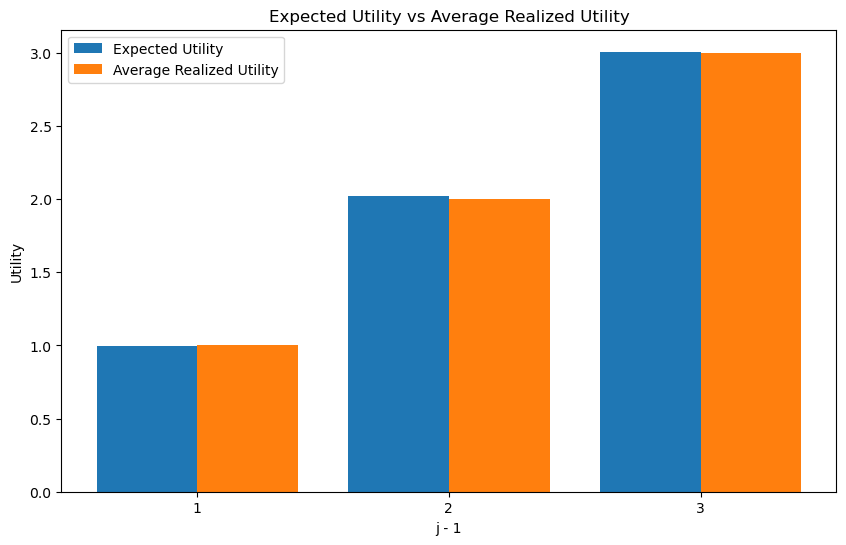

In [8]:
j_values = np.arange(1, par.J+1)

# plot the results
plt.figure(figsize=(10, 6))
plt.bar(j_values - 0.2, expected_utility, 0.4, label='Expected Utility')
plt.bar(j_values + 0.2, average_realized_utility, 0.4, label='Average Realized Utility')

# make pretty
plt.xlabel('j - 1')
plt.ylabel('Utility')
plt.title('Expected Utility vs Average Realized Utility')
plt.xticks(j_values)
plt.legend()

# show the plot
plt.show()

Now consider a new scenario: Imagine that the graduate does not know $v_j$. The *only* prior information they have on the value of each job, comes from their $F_{i}$ friends that work in each career $j$. After talking with them, they know the average utility of their friends (which includes their friends' noise term), giving them the prior expecation: <br>
$$
\tilde{u}^k_{i,j}\left( F_{i}\right) = \frac{1}{F_{i}}\sum_{f=1}^{F_{i}} \left(v_{j} + \epsilon^k_{f,j}\right), \; \epsilon^k_{f,j}\sim \mathcal{N}(0,\sigma^2)
$$
For ease of notation consider that each graduate have $F_{i}=i$ friends in each career. <br>

For $K$ times do the following: <br>
1. For each person $i$ draw $J\cdot F_i$ values of $\epsilon_{f,j}^{k}$, and calculate the prior expected utility of each career track, $\tilde{u}^k_{i,j}\left( F_{i}\right)$. <br>
Also draw their own $J$ noise terms, $\epsilon_{i,j}^k$
1. Each person $i$ chooses the career track with the highest expected utility: $$j_i^{k*}= \arg\max_{j\in{1,2\dots,J}}\left\{ \tilde{u}^k_{i,j}\left( F_{i}\right)\right\} $$
1. Store the chosen careers: $j_i^{k*}$, the prior expectation of the value of their chosen career: $\tilde{u}^k_{i,j=j_i^{k*}}\left( F_{i}\right)$, and the realized value of their chosen career track: $u^k_{i,j=j_i^{k*}}=v_{j=j_i^{k*}}+\epsilon_{i,j=j_i^{k*}}^k$.

Chosen values will be: <br>
$i\in\left\{1,2\dots,N\right\}, N=10$ <br>
$F_i = i$<br>
So there are 10 graduates. The first has 1 friend in each career, the second has 2 friends, ... the tenth has 10 friends.

**Question 2:** Simulate and visualize: For each type of graduate, $i$, the share of graduates choosing each career, the average subjective expected utility of the graduates, and the average ex post realized utility given their choice. <br>
That is, calculate and visualize: <br>
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \mathbb{I}\left\{ j=j_i^{k*} \right\}  \;\forall j\in\left\{1,2,\dots,J\right\}
\end{align*}
$$
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \tilde{u}^k_{ij=j_i^{k*}}\left( F_{i}\right)
\end{align*}
$$
And 
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} u^k_{ij=j_i^{k*}} 
\end{align*}
$$
For each graduate $i$.

In [9]:
# Initialize arrays to store the results for each type of graduate
share_of_graduates_all = np.zeros((par.N, par.J))
average_subjective_utility_all = np.zeros((par.N, par.J))
average_realized_utility_all = np.zeros((par.N, par.J))

# Since we need to do this for each graduate i, we loop over the number of graduates
for i in range(10):
    # We start the loop with the storage for the share of graduates, average subjective utility and average realized utility
    share_of_graduates = np.zeros(par.J)
    average_subjective_utility = np.zeros(par.J)
    average_realized_utility = np.zeros(par.J)
#Now we can activate the loop for each graduate
    for _ in range(par.N):
        # First, simulate the epsilon values
        epsilon = np.random.normal(0, par.sigma, size=(par.J, par.F[i], par.K))
        
        # Secondly, we calculate the prior expected utility for each career j
        prior_expected_utility = np.mean(par.v[:, np.newaxis, np.newaxis] + epsilon, axis=1)
        
        # Third, we calculate the career choice for each graduate
        career_choice = np.argmax(prior_expected_utility, axis=0)
        
        # Fourth, we calculate the share of graduates choosing each career
        for j in range(par.J):
            share_of_graduates[j] += np.mean(career_choice == j)
        
        # Finally, we calculate the average subjective expected utility and average ex post realized utility for each career
        for j in range(par.J):
            indices = np.where(career_choice == j)
            average_subjective_utility[j] += np.mean(prior_expected_utility[j, indices])
            average_realized_utility[j] += np.mean(par.v[j] + epsilon[j, :, indices].mean(axis=1))

    # We divide by the number of graduates to get the share of graduates choosing each career
    share_of_graduates /= par.N

    # Then we do the same to get the average subjective expected utility and average ex post realized utility
    average_subjective_utility /= par.N
    average_realized_utility /= par.N

    # Now we can use the storage from eralier to store the results for each type of graduate
    share_of_graduates_all[i] = share_of_graduates
    average_subjective_utility_all[i] = average_subjective_utility
    average_realized_utility_all[i] = average_realized_utility

# Print the results
for i in range(10):
    print(f"Results for graduate type {i+1}:")
    print("Share of Graduates: ", share_of_graduates_all[i])
    print("Average Subjective Utility: ", average_subjective_utility_all[i])
    print("Average Realized Utility: ", average_realized_utility_all[i])
    print()

Results for graduate type 1:
Share of Graduates:  [0.1483  0.30426 0.54744]
Average Subjective Utility:  [3.42220884 3.75023332 4.11373938]
Average Realized Utility:  [3.42220884 3.75023332 4.11373938]

Results for graduate type 2:
Share of Graduates:  [0.09654 0.27296 0.6305 ]
Average Subjective Utility:  [2.92691577 3.29158573 3.64640356]
Average Realized Utility:  [2.92691577 3.29158573 3.64640356]

Results for graduate type 3:
Share of Graduates:  [0.06626 0.24648 0.68726]
Average Subjective Utility:  [2.73996131 3.09103031 3.44818433]
Average Realized Utility:  [2.73996131 3.09103031 3.44818433]

Results for graduate type 4:
Share of Graduates:  [0.04704 0.22438 0.72858]
Average Subjective Utility:  [2.60911161 2.98340749 3.33357358]
Average Realized Utility:  [2.60911161 2.98340749 3.33357358]

Results for graduate type 5:
Share of Graduates:  [0.0334  0.20433 0.76227]
Average Subjective Utility:  [2.5059143  2.90210326 3.27084353]
Average Realized Utility:  [2.5059143  2.9021032

After a year of working in their career, the graduates learn $u^k_{ij}$ for their chosen job $j_i^{k*}$ perfectly. <br>
The can switch to one of the two remaining careers, for which they have the same prior as before, but it will now include a switching cost of $c$ which is known.
Their new priors can be written as: 
$$
\tilde{u}^{k,2}_{ij}\left( F_{i}\right) = \begin{cases}
            \tilde{u}^k_{ij}\left( F_{i}\right)-c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

We will set $c=1$.

Their realized utility will be: <br>
$$
u^{k,2}_{ij}= \begin{cases}
            u_{ij}^k -c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

**Question 3:** Following the same approach as in question 2, find the new optimal career choice for each $i$, $k$. Then for each $i$, calculate the average subjective expected utility from their new optimal career choice, and the ex post realized utility of that career. Also, for each $i$, calculate the share of graduates that chooses to switch careers, conditional on which career they chose in the first year. <br>

In [10]:
# there are still 10 graduates so we set up new arrays with that are par.N long
np.random.seed(2**6)
new_career_choice = np.zeros(par.N)
new_expected_utility = np.zeros(par.N)
new_realized_utility = np.zeros(par.N)

for i in range(par.N):
    new_career_choice[i]=np.argmax(par.v + np.random.normal(0, par.sigma, size=par.J) - par.c)
    new_expected_utility = par.v + np.random.normal(0, par.sigma, size=par.J) - par.c
    if average_realized_utility.any() < new_expected_utility.any():
        new_career_choice[i] = np.argmax(new_expected_utility)
        new_realized_utility[i] = new_expected_utility[new_career_choice]
    new_realized_utility[i]=new_expected_utility[np.argmax(new_expected_utility)]
# Print the values of the new arrays. we cannot find the correct answers.
print("new_career_choice:", new_career_choice)
print("new_expected_utility:", new_expected_utility) #we cannot make this give 10 answers.
print("new_realized_utility:", new_realized_utility)

# it feels like our answer is very wrong.


new_career_choice: [0. 1. 2. 2. 1. 1. 1. 1. 1. 2.]
new_expected_utility: [-0.4131038  -0.47472331 -1.71466402]
new_realized_utility: [ 4.38583273  5.50097161 -0.01005406  3.18926381  3.47734718 -0.71668134
  1.3504314   4.71541099  6.80915287 -0.4131038 ]


## 3. <a id='toc3_'></a>[Problem 3: Barycentric interpolation](#toc0_)

**Problem:** We have a set of random points in the unit square,

$$
\mathcal{X} = \{(x_1,x_2)\,|\,x_1\sim\mathcal{U}(0,1),x_2\sim\mathcal{U}(0,1)\}.
$$

For these points, we know the value of some function $f(x_1,x_2)$,

$$
\mathcal{F} = \{f(x_1,x_2) \,|\, (x_1,x_2) \in \mathcal{X}\}.
$$

Now we want to approximate the value $f(y_1,y_2)$ for some  $y=(y_1,y_2)$, where $y_1\sim\mathcal{U}(0,1)$ and $y_2\sim\mathcal{U}(0,1)$.

**Building block I**

For an arbitrary triangle $ABC$ and a point $y$, define the so-called barycentric coordinates as:

$$
\begin{align*}
  r^{ABC}_1 &= \frac{(B_2-C_2)(y_1-C_1) + (C_1-B_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_2 &= \frac{(C_2-A_2)(y_1-C_1) + (A_1-C_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_3 &= 1 - r_1 - r_2.
\end{align*}
$$

If $r^{ABC}_1 \in [0,1]$, $r^{ABC}_2 \in [0,1]$, and $r^{ABC}_3 \in [0,1]$, then the point is inside the triangle.

We always have $y = r^{ABC}_1 A + r^{ABC}_2 B + r^{ABC}_3 C$.

**Building block II**

Define the following points:

$$
\begin{align*}
A&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}>y_{2}\\
B&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}<y_{2}\\
C&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}<y_{2}\\
D&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}>y_{2}.
\end{align*}
$$

**Algorithm:**

1. Compute $A$, $B$, $C$, and $D$. If not possible return `NaN`.
1. If $y$ is inside the triangle $ABC$ return $r^{ABC}_1 f(A) + r^{ABC}_2 f(B) + r^{ABC}_3 f(C)$.
1. If $y$ is inside the triangle $CDA$ return $r^{CDA}_1 f(C) + r^{CDA}_2 f(D) + r^{CDA}_3 f(A)$.
1. Return `NaN`.



**Sample:**

In [11]:
rng = np.random.default_rng(2024)

X = rng.uniform(size=(50,2))
y = rng.uniform(size=(2,))


**Questions 1:** Find $A$, $B$, $C$ and $D$. Illustrate these together with $X$, $y$ and the triangles $ABC$ and $CDA$.

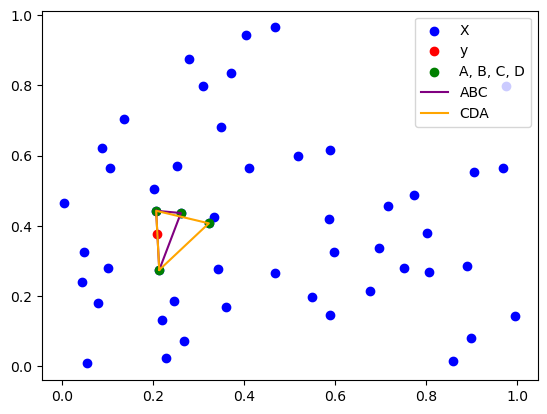

A: [0.20634391 0.44272557], B: [0.26071605 0.43635845], C: [0.21315735 0.274245  ], D: [0.32209779 0.40699871]
Barycentric coordinates with respect to ABC: (0.6134829803310216, 0.0008797864519075784, 0.3856372332170709)
Barycentric coordinates with respect to CDA: (0.3855821621027246, 0.00041649660997332384, 0.614001341287302)


In [12]:
# First we need to define the diffrent functions that we will use in the model
def barycentric_coords(A, B, C, y):
    #To start with we define ABC to make the code more simple when we define r1, r2 and r3
    ABC = ((B[1] - C[1])*(A[0] - C[0]) + (C[0] - B[0])*(A[1] - C[1]))
    r1 = ((B[1] - C[1])*(y[0] - C[0]) + (C[0] - B[0])*(y[1] - C[1])) / ABC
    r2 = ((C[1] - A[1])*(y[0] - C[0]) + (A[0] - C[0])*(y[1] - C[1])) / ABC
    return r1, r2, 1 - r1 - r2
#Here we define the function that finds the four points closest to y
def find_points(X, y):
    distances = np.sum((X - y)**2, axis=1)
    return X[np.argsort(distances)[:4]]
#We define the function that plots the points and the triangles. rng is the random number generator(we use seed 2024), X is the points, y is the point we want to find the closest points to, A, B, C and D are the four points closest to y.
rng = np.random.default_rng(2024)
X = rng.uniform(size=(50,2))
y = rng.uniform(size=(2,))
A, B, C, D = find_points(X, y)
r_ABC = barycentric_coords(A, B, C, y)
r_CDA = barycentric_coords(C, D, A, y)
#Now we can plot the points and the triangles
def plot_points_and_triangles(X, y, A, B, C, D):
    plt.scatter(X[:, 0], X[:, 1], color='blue', label='X')
    plt.scatter(y[0], y[1], color='red', label='y')
    plt.scatter([A[0], B[0], C[0], D[0]], [A[1], B[1], C[1], D[1]], color='green', label='A, B, C, D')
    plt.plot([A[0], B[0], C[0], A[0]], [A[1], B[1], C[1], A[1]], color='purple', label='ABC')
    plt.plot([C[0], D[0], A[0], C[0]], [C[1], D[1], A[1], C[1]], color='orange', label='CDA')
    plt.legend()
    plt.show()

plot_points_and_triangles(X, y, A, B, C, D)
print(f"A: {A}, B: {B}, C: {C}, D: {D}")
print(f"Barycentric coordinates with respect to ABC: {r_ABC}")
print(f"Barycentric coordinates with respect to CDA: {r_CDA}")

**Question 2:** Compute the barycentric coordinates of the point $y$ with respect to the triangles $ABC$ and $CDA$. Which triangle is $y$ located inside?

In [13]:
# We can just print the resulst from the code above
print(f"The coordinates of y are: {y}")
print(f"Barycentric coordinates of y with respect to ABC: {r_ABC}")
print(f"Barycentric coordinates of y with respect to CDA: {r_CDA}")

# This code is used to check if y is inside the triangle ABC or CDA. If y is inside 1 of the triagles, allt its barycentric coordinates should be between 0 and 1.
def is_inside_triangle(barycentric_coords):
    return all(0 <= r <= 1 for r in barycentric_coords)

if is_inside_triangle(r_ABC):
    print("y is inside triangle ABC")
elif is_inside_triangle(r_CDA):
    print("y is inside triangle CDA")
else:
    print("y is not inside either triangle")

The coordinates of y are: [0.20901926 0.37774759]
Barycentric coordinates of y with respect to ABC: (0.6134829803310216, 0.0008797864519075784, 0.3856372332170709)
Barycentric coordinates of y with respect to CDA: (0.3855821621027246, 0.00041649660997332384, 0.614001341287302)
y is inside triangle ABC


Now consider the function:
$$
f(x_1,x_2) = x_1 \cdot x_2
$$

In [14]:
f = lambda x: x[0]*x[1]
F = np.array([f(x) for x in X])

**Question 3:** Compute the approximation of $f(y)$ using the full algorithm. Compare with the true value.

In [15]:
# We create the function that calculates the barycentric coordinates with the true value of f(y)
true_value = f(y)

# Approximate f(y) using the average value of f at A, B, C, and D
approximation = (f(A) + f(B) + f(C) + f(D)) / 4

# Compare the approximation with the true value
print(f"True value of f(y): {true_value}")
print(f"Approximated value of f(y): {approximation}")
print(f"Difference: {abs(true_value - approximation)}")

True value of f(y): 0.0789565216259594
Approximated value of f(y): 0.09866752475350346
Difference: 0.019711003127544063


**Question 4:** Repeat question 3 for all points in the set $Y$.

In [16]:
Y = [(0.2,0.2),(0.8,0.2),(0.8,0.8),(0.8,0.2),(0.5,0.5)]

In [17]:


# We create a loop that will do the same as the code above for each point in Y
for i, y in enumerate(Y):
    # Again we have to calculate the true value of f(y)
    true_value = f(y)
    
    # Then we need to find the four points closest to y
    A, B, C, D = find_points(X, y)
    
    # And like before we approximate f(y) using the average value of f at A, B, C, and D
    approximation = (f(A) + f(B) + f(C) + f(D)) / 4
    
    # Caculate the difference between the true value and the approximation
    difference = abs(true_value - approximation)
    
    # Print 
    print(f"Point {i+1}: y = {y}, True value = {true_value}, Approximation = {approximation}, Difference = {difference}")

Point 1: y = (0.2, 0.2), True value = 0.04000000000000001, Approximation = 0.0366916258222152, Difference = 0.0033083741777848105
Point 2: y = (0.8, 0.2), True value = 0.16000000000000003, Approximation = 0.20655455924865712, Difference = 0.04655455924865709
Point 3: y = (0.8, 0.8), True value = 0.6400000000000001, Approximation = 0.547901500729161, Difference = 0.09209849927083913
Point 4: y = (0.8, 0.2), True value = 0.16000000000000003, Approximation = 0.20655455924865712, Difference = 0.04655455924865709
Point 5: y = (0.5, 0.5), True value = 0.25, Approximation = 0.2879071225950355, Difference = 0.03790712259503548
